1.	Load the dataset 'clients.csv' as a dataframe df_clients

In [55]:
import pandas as pd

In [56]:
df_clients=pd.read_csv('clients.csv',index_col=0,header=0)
df_clients

,Gender,Birth date,Annual Outcome,Annual Spending,Profession,Work experience,Family size
Customer ID,,,,,,,
Ahmed,Male,10/10/1993,24000,700,Healthcare,5,3
Sonia,Female,11/09/1998,25000,800,Engineer,2,2
Salma,Female,12/01/1991,24000,200,Lawyer,5,2
Walid,Male,10/01/1987,23500,250,Entertainment,4,3
Ramzi,Male,12/11/1995,25000,900,Doctor,3,2


2.	Keep only the columns 'Gender', 'Birth date', 'Family size' columns in df_clients dataframe

In [57]:
# Keep in df_clients_social only the following columns 'Gender' , 'Birthdate' and 'Family Size'
df_clients_social=df_clients.loc[:,['Gender','Birth date','Family size']]
df_clients_social

,Gender,Birth date,Family size
Customer ID,,,
Ahmed,Male,10/10/1993,3
Sonia,Female,11/09/1998,2
Salma,Female,12/01/1991,2
Walid,Male,10/01/1987,3
Ramzi,Male,12/11/1995,2


3.	Replace 'Birth date' column by 'Adult' column as follows :
- 1 if the client age > mean(age)
- 0 else

In [58]:
from datetime import datetime
df_clients_social['Birth date']=pd.to_datetime(df_clients_social['Birth date'])   
df_clients_social['age']=df_clients_social['Birth date'].apply(lambda date : datetime.now().year-date.year)
df_clients_social.drop('Birth date', axis=1, errors='ignore', inplace=True)
mean_age = df_clients_social['age'].mean()
def filtrer_age(age):
    if age>mean_age:
        return 1
    else:
        return 0
df_clients_social['Adult']=df_clients_social['age'].apply(filtrer_age)
df_clients_social.drop('age', axis=1, errors='ignore', inplace=True)
df_clients_social

,Gender,Family size,Adult
Customer ID,,,
Ahmed,Male,3,0
Sonia,Female,2,0
Salma,Female,2,1
Walid,Male,3,1
Ramzi,Male,2,0


4. Replace 'Gender' by its OHE encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(df_clients_social[['Gender']])
gender_encoded=pd.DataFrame(ohe.transform(df_clients_social[['Gender']]).toarray(),
                            columns='Gender ' + ohe.categories_[0],
                            index=df_clients_social.index)
df_clients_social=pd.concat([df_clients_social,gender_encoded] , axis=1)
df_clients_social.drop('Gender', axis=1, errors='ignore', inplace=True)
df_clients_social

,Family size,Adult,Gender Female,Gender Male
Customer ID,,,,
Ahmed,3,0,0.0,1.0
Sonia,2,0,1.0,0.0
Salma,2,1,1.0,0.0
Walid,3,1,0.0,1.0
Ramzi,2,0,0.0,1.0


5. Normalize the Family size 'column' using this formula :
        
        familty size = (family size - min)/(max - min)

Note : You can compute the minimum or the maximum of a column ‘A’ of a dataframe df as follows:

        min=df[‘A’].min() 
        max=df[‘A’].max()


In [60]:
min=df_clients_social['Family size'].min()
max=df_clients_social['Family size'].max()
df_clients_social['Family size']=df_clients_social['Family size'].apply(
                lambda family_size : (family_size-min)/(max-min))
df_clients_social

,Family size,Adult,Gender Female,Gender Male
Customer ID,,,,
Ahmed,1.0,0,0.0,1.0
Sonia,0.0,0,1.0,0.0
Salma,0.0,1,1.0,0.0
Walid,1.0,1,0.0,1.0
Ramzi,0.0,0,0.0,1.0


6. Reduce the dimensions of the dataset using PCA (keep only 2 dimensions)

In [61]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_clients_social)
X_pca=pca.transform(df_clients_social)
X_pca

array([[-0.81969569, -0.23040667],
       [ 0.9015097 , -0.40386659],
       [ 0.97649293,  0.52261765],
       [-0.74471246,  0.69607757],
       [-0.31359447, -0.58442197]])

7. Apply Kmeans on the resulting dataset to regroup the clients into 2 clusters

In [62]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
km.fit(X_pca)
labels = km.predict(X_pca)
cluster0=X_pca[labels==0,:]
cluster1=X_pca[labels==1,:]

c:\Users\Polytech INTL\OneDrive - POLYTECH INTL\Desktop\IRM2_2023\AI_course\venv_ai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8. Predict and visualize the clusters in a figure
- Use different colors
- Show the labels


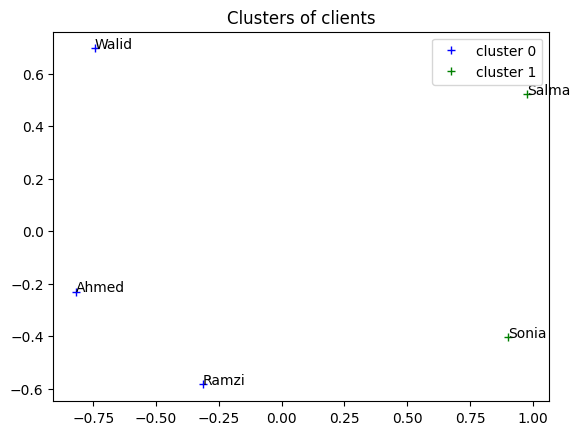

In [63]:
# Show the cluster points with differents colors (based on cluster) and + symbol 
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'b+', label='cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'g+', label='cluster 1')

for nom, x, y in zip(df_clients_social.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

plt.legend()
plt.title('Clusters of clients')
plt.show()

9.	Let ‘Sondes’ be a new client. Their informations are Gender : Female , Family size : 1, Birth date: 04/02/2000.
- Predict the cluster label of ‘Sondes’
- Visualize ‘Sondes’ and its cluster label in the figure along side the other clients


In [64]:
df_sondes = pd.DataFrame([['Female','04/02/2000',1]], 
                        columns=['Gender','Birth date','Family size'], 
                        index=['Sondes'])
df_sondes

,Gender,Birth date,Family size
Sondes,Female,04/02/2000,1


In [65]:
df_sondes['Birth date']=pd.to_datetime(df_sondes['Birth date'])   
df_sondes['age']=df_sondes['Birth date'].apply(lambda date : datetime.now().year-date.year)
df_sondes['Adult']=df_sondes['age'].apply(filtrer_age)
df_sondes.drop('age', axis=1, errors='ignore', inplace=True)
df_sondes.drop('Birth date', axis=1, errors='ignore', inplace=True)
df_sondes

,Gender,Family size,Adult
Sondes,Female,1,0


In [66]:
gender_encoded=pd.DataFrame(ohe.transform(df_sondes[['Gender']]).toarray(),
                            columns='Gender ' + ohe.categories_[0],
                            index=df_sondes.index)
df_sondes=pd.concat([df_sondes,gender_encoded] , axis=1)
df_sondes.drop('Gender', axis=1, errors='ignore', inplace=True)
df_sondes

,Family size,Adult,Gender Female,Gender Male
Sondes,1,0,1.0,0.0


In [71]:
df_sondes['Family size']=df_sondes['Family size'].apply(
                lambda family_size : (family_size-min)/(max-min))
df_sondes

,Family size,Adult,Gender Female,Gender Male
Sondes,-1.0,0,1.0,0.0


In [73]:
X_pca_sondes=pca.transform(df_sondes)
X_pca_sondes

array([[ 1.40761092, -0.75788189]])

In [75]:
label_sondes = km.predict(X_pca_sondes)
label_sondes

array([1])

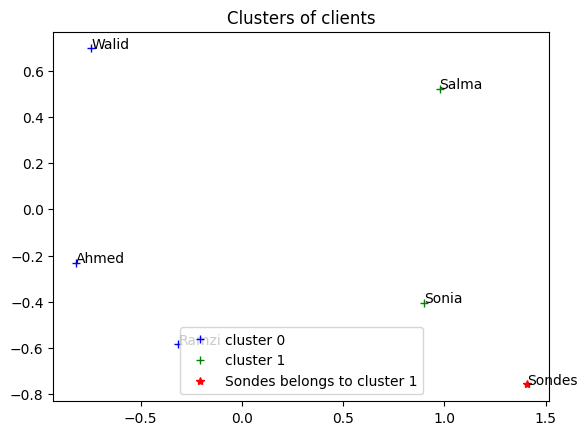

In [81]:
# Show the cluster points with differents colors (based on cluster) and + symbol 
import matplotlib.pyplot as plt

# plot clients data points
plt.plot(cluster0[:,0],cluster0[:,1],'b+', label='cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'g+', label='cluster 1')
plt.plot(X_pca_sondes[0,0],X_pca_sondes[0,1],'r*', label='Sondes belongs to cluster '+str(label_sondes[0]))

# annotation of clients names
for nom, x, y in zip(df_clients_social.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")

plt.annotate('Sondes', xy =(X_pca_sondes[0,0], X_pca_sondes[0,1]), xycoords="data")

plt.legend()
plt.title('Clusters of clients')
plt.show()